# Twitter Sentiment Analysis

In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import re  
import nltk 
import string
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',200)

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train[train['label']==1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"


In [5]:
test.shape, train.shape

((17197, 2), (31962, 3))

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

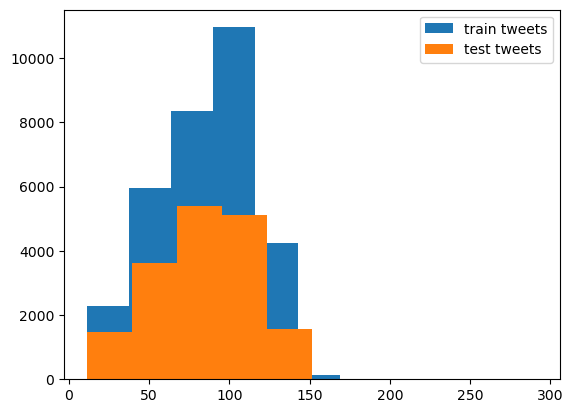

In [7]:
length_train= train['tweet'].str.len()
length_test= test['tweet'].str.len()
plt.hist(length_train,label='train tweets')
plt.hist(length_test,label='test tweets')
plt.legend()
plt.show()

In [8]:
combi=train.append(test,ignore_index=True)
combi.shape

(49159, 3)

## Data Cleaning


In [9]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt= re.sub(i,'',input_txt)
    return input_txt

In [10]:
# removing twitter handles
combi['tidy_tweets']=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
combi['tidy_tweets']=combi['tidy_tweets'].str.replace('[^a-zA-Z#]'," ")
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
combi['tidy_tweets']=combi['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Text Normalization

In [13]:
tokenized_tweet= combi['tidy_tweets'].apply(lambda x:x.split()) #Tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweets, dtype: object

In [14]:
from nltk.stem.porter import *
stemmer= PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #Stemming
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweets, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=''.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweets,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run,whenfatherdysfunctselfishdragkidintodysfunct#run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked,thank#lyftcreditcaustheyofferwheelchairvan#disapoint#getthank
2,3,0.0,bihday your majesty,bihday your majesty,bihdayyourmajesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time,#modellovetakewithtime
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,factsguidsocieti#motiv


## Exploring and visualizing data

In [16]:
all_words=' '.join([text for text in combi['tidy_tweets']])

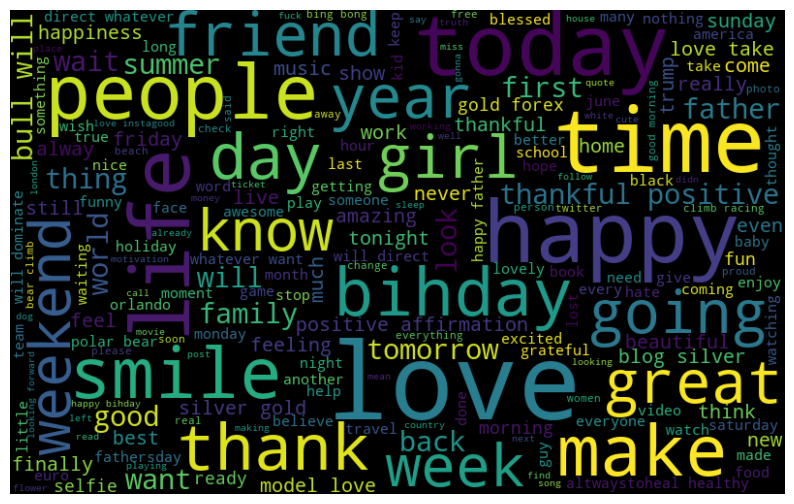

In [17]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500, random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

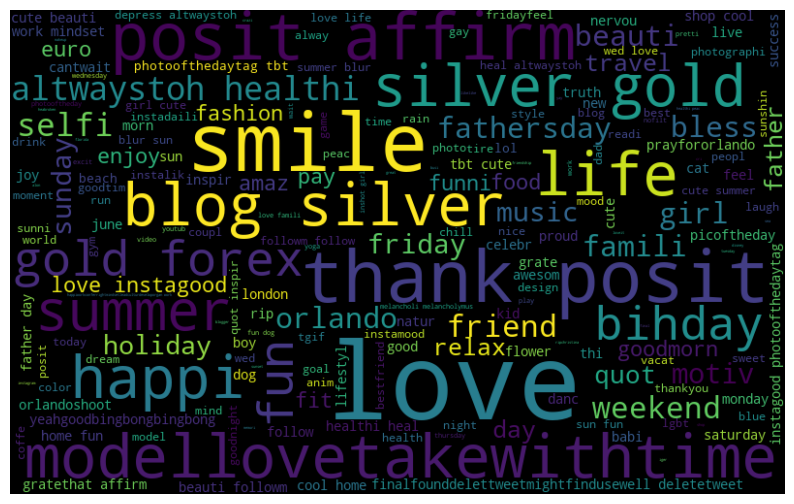

In [18]:
normal_words= ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud=WordCloud(width=800,height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

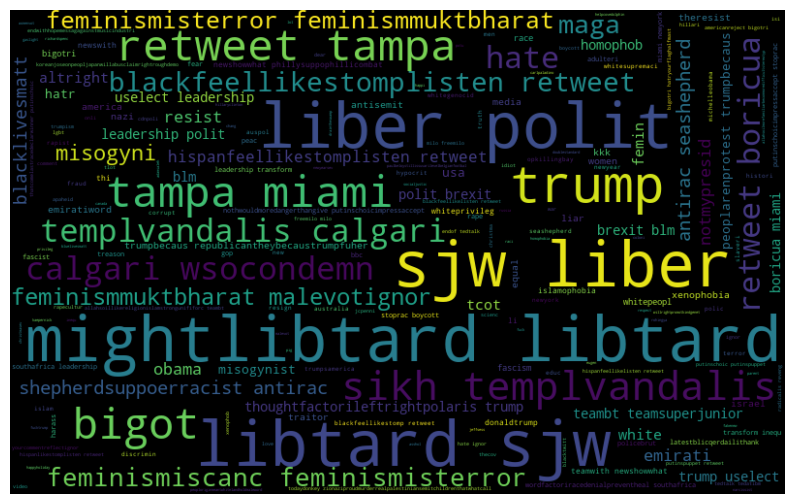

In [19]:
racist_words= ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500, random_state=21, max_font_size=110).generate(racist_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht= re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags
HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])      

In [21]:
HT_regular[1:5]

[['lyftcreditcaustheyofferwheelchairvan', 'disapoint', 'getthank'],
 [],
 ['modellovetakewithtime'],
 ['motiv']]

In [22]:
HT_regular= sum(HT_regular,[])
HT_regular[1:5]

['lyftcreditcaustheyofferwheelchairvan',
 'disapoint',
 'getthank',
 'modellovetakewithtime']

In [23]:
HT_negative=sum(HT_negative,[])
HT_negative[1:5]

['michiganmiddlschoolbuildwallchant', 'tcot', 'australia', 'opkillingbay']

In [24]:
a=nltk.FreqDist(HT_regular)
a

FreqDist({'love': 1539, 'posit': 897, 'smile': 622, 'thank': 515, 'healthi': 504, 'fun': 450, 'affirm': 422, 'life': 397, 'summer': 371, 'cute': 356, ...})

In [25]:
d=pd.DataFrame({'hashtag': list(a.keys()), 'count': list(a.values())})
d.head()

,hashtag,count
0,run,63
1,lyftcreditcaustheyofferwheelchairvan,1
2,disapoint,1
3,getthank,2
4,modellovetakewithtime,325


In [26]:
d=d.nlargest(columns='count',n=20)
d

,hashtag,count
32,love,1539
39,posit,897
210,smile,622
38,thank,515
158,healthi,504
178,fun,450
92,affirm,422
354,life,397
296,summer,371
367,cute,356


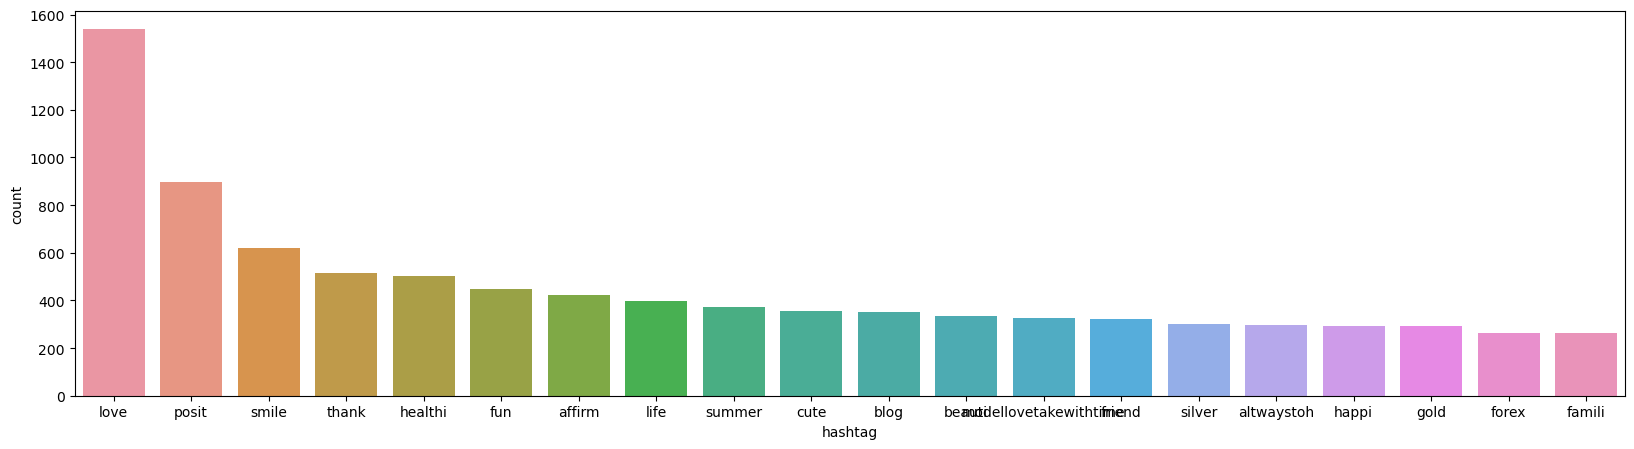

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

In [28]:
a=nltk.FreqDist(HT_negative)
a

FreqDist({'polit': 94, 'liber': 76, 'libtard': 74, 'sjw': 74, 'trump': 69, 'retweet': 63, 'miami': 44, 'tampa': 32, 'bigot': 30, 'hate': 27, ...})

In [29]:
d=pd.DataFrame({'hashtag': (a.keys()), 'count': (a.values())})
d.head()

,hashtag,count
0,cnncall,2
1,michiganmiddlschoolbuildwallchant,2
2,tcot,13
3,australia,5
4,opkillingbay,5


In [30]:
d=d.nlargest(columns='count',n=20)
d

,hashtag,count
32,polit,94
31,liber,76
29,libtard,74
30,sjw,74
147,trump,69
64,retweet,63
66,miami,44
65,tampa,32
74,bigot,30
38,hate,27


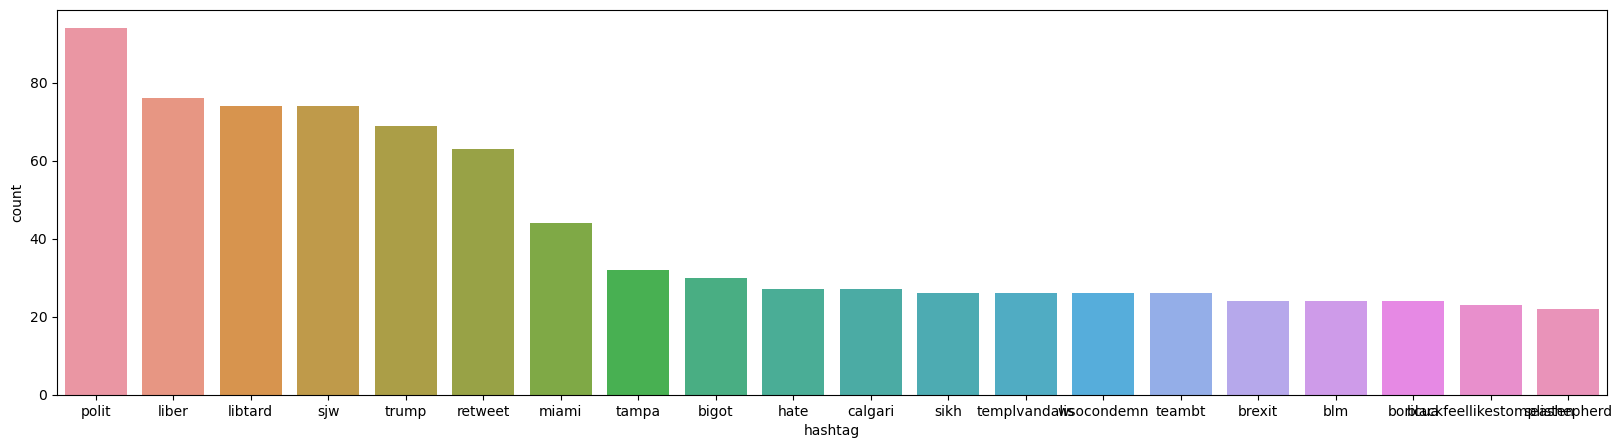

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

## Bag of words feature

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [33]:
bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow= bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [34]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf= tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

## Model building using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:, :]

xtrain,xtest,ytrain,ytest=train_test_split(train_bow,train['label'], test_size=0.25, random_state=1)

lreg=LogisticRegression()
lreg.fit(xtrain,ytrain)
pred=lreg.predict_proba(xtest)
pred_int=pred[:,1]>=0.2

In [36]:
pred_int=pred_int.astype(np.int)
f1_score(ytest,pred_int)

0.4660691421254801

In [37]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int= test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg.csv',index=False)

In [38]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

xtrain_t,xtest_t,ytrain_t,ytest_t= train_test_split(train_tfidf, train['label'],test_size=0.3, random_state=42)

lreg.fit(xtrain_t,ytrain_t)
pred= lreg.predict_proba(xtest_t)
pred= pred[:,1]>=0.3
pred=pred.astype(np.int)

f1_score(ytest_t,pred)

0.439344262295082

## Support Vector MAchine

In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC(kernel='linear', C=1, probability=True).fit(xtrain,ytrain)
pred=svc.predict_proba(xtest)
pred=pred[:,1]>=0.2
pred=pred.astype(np.int)
f1_score(ytest,pred)

0.445910290237467

In [41]:

test_pred=(svc.predict_proba(test_bow)[:,1]>=0.3).astype(np.int)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('SVC.csv',index=False)

In [42]:
svc=SVC(kernel='linear', C=1, probability=True).fit(xtrain_t,ytrain_t)
pred=svc.predict_proba(xtest_t)
pred=pred[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(ytest_t,pred)

0.4282608695652175

In [45]:
from sklearn import datasets
iris = datasets.load_iris()


## Random forest classification

In [47]:
rf=RandomForestClassifier(n_estimators= 400, random_state=100).fit(xtrain,ytrain)
pred=(rf.predict_proba(xtest)[:,1]>=0.30).astype(np.int)
f1_score(ytest,pred)

0.4510739856801909

In [49]:
test_pred= rf.predict_proba(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('RandomForest.csv',index=False)

In [50]:
rf=RandomForestClassifier(n_estimators= 400, random_state=100).fit(xtrain_t,ytrain_t)
pred=(rf.predict_proba(xtest_t)[:,1]>=0.30).astype(np.int)
f1_score(ytest_t,pred)

0.4444444444444444